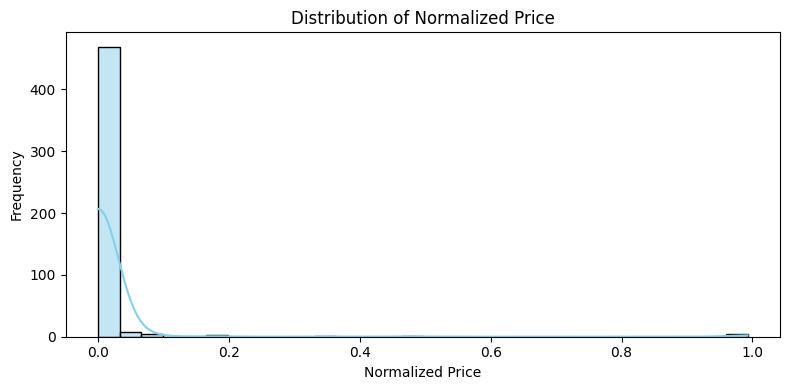

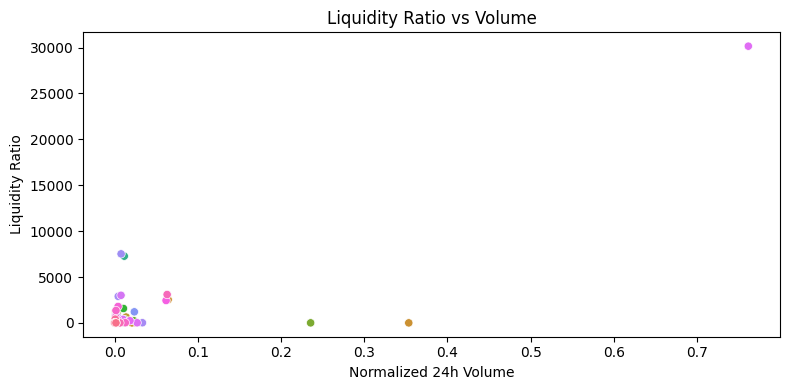

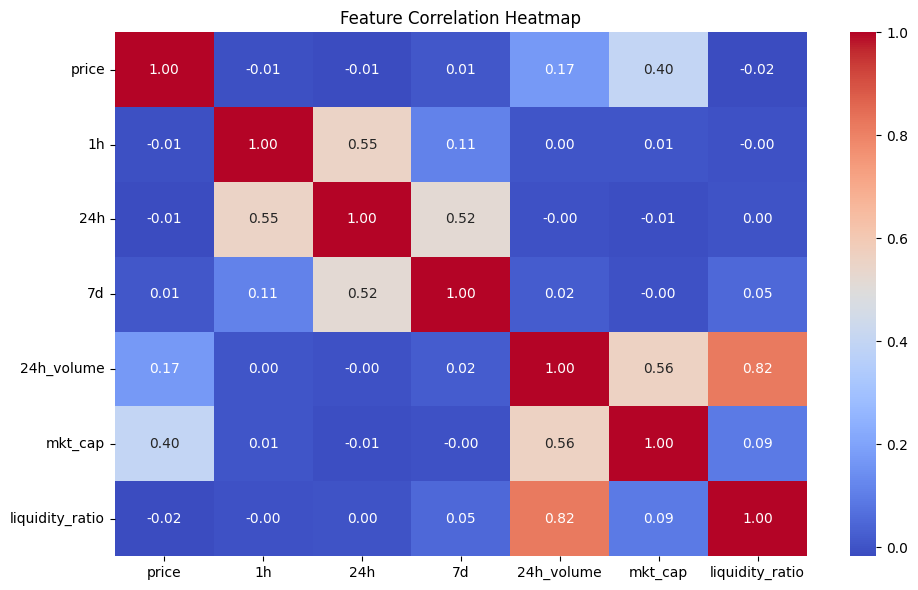

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("dataset/feature_engineered_crypto_data.csv")

# Add back derived features (if not saved)
df['cap_to_volume'] = df['mkt_cap'] / (df['24h_volume'] + 1e-6)
df['weighted_change'] = df['24h'] * df['24h_volume']
df['liquidity_ratio'] = df['24h_volume'] / (df['price'] + 1e-6)

# Drop NaNs
df.dropna(inplace=True)

# 1. Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Normalized Price")
plt.xlabel("Normalized Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Liquidity Ratio vs 24h Volume
plt.figure(figsize=(8, 4))
sns.scatterplot(x='24h_volume', y='liquidity_ratio', data=df, hue='coin', legend=False)
plt.title("Liquidity Ratio vs Volume")
plt.xlabel("Normalized 24h Volume")
plt.ylabel("Liquidity Ratio")
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_ratio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


# Summary of Dataset Statistics
After cleaning and normalization, the dataset contained:
- Rows: 1000 total (500 per day across two days)
- Features:
    - Raw: price, 1h, 24h, 7d, 24h_volume, mkt_cap, date
    - Engineered: liquidity_ratio, cap_to_volume, weighted_change
    - Missing values: Only a few rows (3–5) were dropped due to missing values in volume or percent changes.
    - Normalization: All numerical features were scaled using MinMaxScaler to a range of [0, 1].



# Basic Visualizations
1. Distribution of Price
    - Used: sns.histplot()
    - Insight: Most coins have normalized prices close to 0, indicating a left-skewed distribution — few high-value coins like BTC, most are low-value altcoins.

2. Liquidity Ratio vs Volume
    - Used: sns.scatterplot()
    - Insight: Shows a positive trend — higher volume is generally associated with a higher liquidity ratio. High-volume coins tend to be more stable.

3. Correlation Heatmap
    - Used: sns.heatmap(df.corr())
    - Insight:
        - Strong correlation between:
            - liquidity_ratio and 24h_volume
            - liquidity_ratio and mkt_cap
            - Weak correlation with short-term price changes (1h, 7d)

